In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [150]:
def rotate_vector(vector, axis, angle):
    """
    Rotate a 3D vector around a specified axis by a given angle.

    Parameters:
    vector (numpy.ndarray): The 3D vector to rotate.
    axis (numpy.ndarray): The unit vector representing the axis of rotation.
    angle (float): The angle of rotation in radians.

    Returns:
    numpy.ndarray: The rotated vector.
    """
    # Ensure the axis is a unit vector
    axis = axis / np.linalg.norm(axis)
    
    # Calculate rotation matrix using Rodrigues' rotation formula
    cos_theta = np.cos(angle)
    sin_theta = np.sin(angle)
    cross_matrix = np.array([[0, -axis[2], axis[1]],
                             [axis[2], 0, -axis[0]],
                             [-axis[1], axis[0], 0]])
    rotation_matrix = cos_theta * np.eye(3) + (1 - cos_theta) * np.outer(axis, axis) + sin_theta * cross_matrix
    
    # Perform the rotation
    rotated_vector = np.dot(rotation_matrix, vector)
    
    return rotated_vector


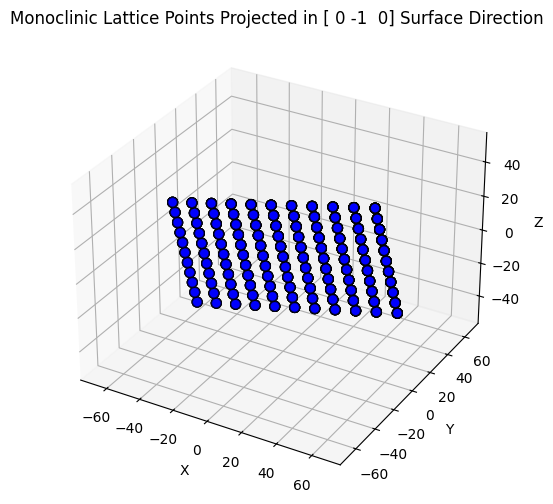

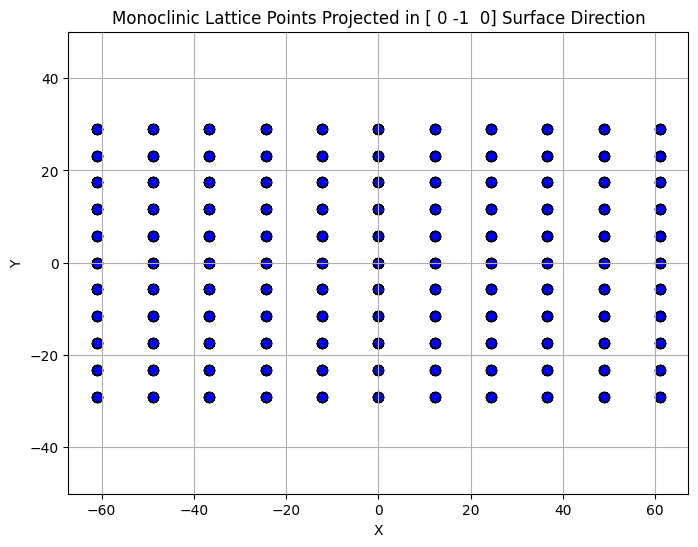

In [182]:
import matplotlib.pyplot as plt
import numpy as np

# Define lattice parameters (adjust as needed)
a = 12.214  # Length along a-axis
b = 3.0371  # Length along b-axis
c = 5.7981  # Length along c-axis
alpha = np.radians(90)      # Angle between b and c (in radians)
beta = np.radians(103.83)   # Angle between a and c (in radians)
gamma = np.radians(90)      # Angle between a and b (in radians)

# Generate lattice vectors(소수점 10자리까지만 취급하자.)
vec_a = np.array([a, 0, 0]).round(10)
vec_a = rotate_vector(vec_a, np.array([0,1,0]), np.deg2rad(-13.83))
vec_b = np.array([b * np.cos(gamma), b * np.sin(gamma), 0]).round(10)
vec_c = np.array([c * np.cos(beta), c * (np.cos(alpha) - np.cos(beta)*np.cos(gamma)) / np.sin(gamma), c * np.sqrt(1 + 2 * np.cos(alpha) * np.cos(beta) * np.cos(gamma) - np.cos(alpha)**2 - np.cos(beta)**2 - np.cos(gamma)**2) / np.sin(gamma)]).round(10)

# Normal vector to the [h k l] surface(h k l 방향의 단위벡터로 표시 하면 된다.)
h1, k1, l1 = 1,0,0
h2, k2, l2 = 0,0,1

normal_miller_index = np.cross(np.array([h1, k1, l1]), np.array([h2, k2, l2]))

# Calculate vectors in the plane of interest
vec_x = vec_a * h1 + vec_b * k1 + vec_c * l1
vec_y = vec_a * h2 + vec_b * k2 + vec_c * l2

# Normalize vec_x and vec_y to unit vectors
unit_vec_x = vec_x / np.linalg.norm(vec_x)
unit_vec_y = vec_y / np.linalg.norm(vec_y)

surface_normal = np.cross(vec_x, vec_y)
surface_normal /= np.linalg.norm(surface_normal)

# Generate lattice points
num_points = 5  # Adjust as needed
points = []
projections = []
for i in range(-num_points, num_points + 1):
    for j in range(-num_points, num_points + 1):
        for k in range(-num_points, num_points + 1):
            lattice_point = i * vec_a + j * vec_b + k * vec_c
            points.append(lattice_point)
            projection = lattice_point - np.dot(lattice_point, surface_normal) * surface_normal
            projections.append(projection)


# Extract x, y, z coordinates for plotting
x_coords = [point[0] for point in projections]
y_coords = [point[1] for point in projections]
z_coords = [point[2] for point in projections]

# Plot lattice points projected in normal surface direction
fig1 = plt.figure(figsize=(8, 6))
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, color='blue', s=50, edgecolor='black')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'Monoclinic Lattice Points Projected in {normal_miller_index} Surface Direction')
ax.axis('equal')
plt.show()



# Extract x, y coordinates for plotting
x_coords_2d = [np.dot(point, unit_vec_x) for point in projections]
y_coords_2d = [np.dot(point, unit_vec_y) for point in projections]

# Plot lattice points projected in normal surface direction on a 2D plane
fig2 = plt.figure(figsize=(8, 6))
plt.scatter(x_coords_2d, y_coords_2d, color='blue', s=50, edgecolor='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Monoclinic Lattice Points Projected in {normal_miller_index} Surface Direction')
plt.grid(True)

# Ensure equal scaling on both axes
plt.axis('equal')
plt.show()

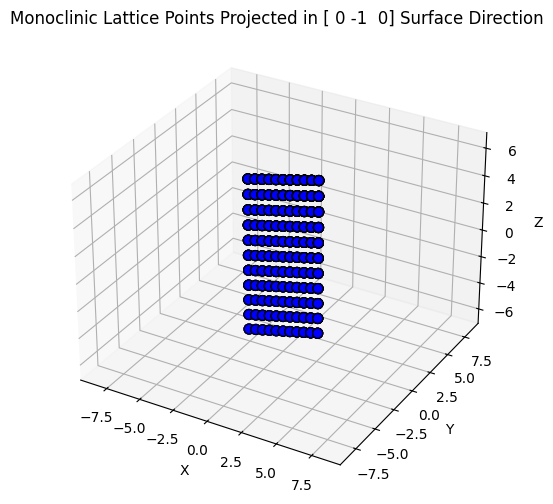

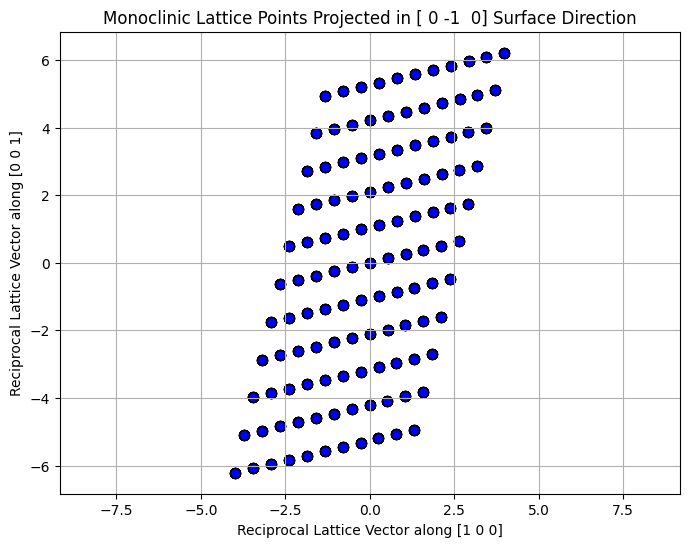

In [188]:
# Define lattice parameters (adjust as needed)
a = 12.214  # Length along a-axis
b = 3.0371  # Length along b-axis
c = 5.7981  # Length along c-axis
alpha = np.radians(90)      # Angle between b and c (in radians)
beta = np.radians(103.83)   # Angle between a and c (in radians)
gamma = np.radians(90)      # Angle between a and b (in radians)

# Generate lattice vectors (rounded to 10 decimal places)
vec_a = np.array([a, 0, 0]).round(10)
# vec_a = rotate_vector(vec_a, np.array([0,1,0]), np.deg2rad(13.83))
# vec_b = np.array([0, b, 0]).round(10)
# vec_c = np.array([0, 0, c]).round(10)
vec_b = np.array([b * np.cos(gamma), b * np.sin(gamma), 0]).round(10)
vec_c = np.array([c * np.cos(beta), c * (np.cos(alpha) - np.cos(beta)*np.cos(gamma)) / np.sin(gamma), c * np.sqrt(1 + 2 * np.cos(alpha) * np.cos(beta) * np.cos(gamma) - np.cos(alpha)**2 - np.cos(beta)**2 - np.cos(gamma)**2) / np.sin(gamma)]).round(10)

# Calculate reciprocal lattice vectors
recip_vec_a = 2 * np.pi * np.cross(vec_b, vec_c) / np.dot(vec_a, np.cross(vec_b, vec_c))
recip_vec_b = 2 * np.pi * np.cross(vec_c, vec_a) / np.dot(vec_b, np.cross(vec_c, vec_a))
recip_vec_c = 2 * np.pi * np.cross(vec_a, vec_b) / np.dot(vec_c, np.cross(vec_a, vec_b))

# Normal vector to the [h k l] surface(h k l 방향의 단위벡터로 표시 하면 된다.)
h1, k1, l1 = 1,0,0
h2, k2, l2 = 0,0,1

normal_miller_index = np.cross(np.array([h1, k1, l1]), np.array([h2, k2, l2]))

# Calculate vectors in the plane of interest
recip_vec_x = recip_vec_a * h1 + recip_vec_b * k1 + recip_vec_c * l1
recip_vec_y = recip_vec_a * h2 + recip_vec_b * k2 + recip_vec_c * l2

# Normalize vec_x and vec_y to unit vectors
unit_vec_x = recip_vec_x / np.linalg.norm(recip_vec_x)
unit_vec_y = recip_vec_y / np.linalg.norm(recip_vec_y)

surface_normal = np.cross(unit_vec_x, unit_vec_y)
surface_normal /= np.linalg.norm(surface_normal)

# Generate lattice points
num_points = 5  # Adjust as needed
reciprocal_points = []
reciprocal_projections = []
for i in range(-num_points, num_points + 1):
    for j in range(-num_points, num_points + 1):
        for k in range(-num_points, num_points + 1):
            reciprocal_lattice_point = i * recip_vec_a + j * recip_vec_b + k * recip_vec_c
            reciprocal_points.append(reciprocal_lattice_point)
            reciprocal_projection = reciprocal_lattice_point - np.dot(reciprocal_lattice_point, surface_normal) * surface_normal
            reciprocal_projections.append(reciprocal_projection)

# Extract x, y, z coordinates for plotting
x_coords = [point[0] for point in reciprocal_projections]
y_coords = [point[1] for point in reciprocal_projections]
z_coords = [point[2] for point in reciprocal_projections]

# Plot lattice points projected in normal surface direction
fig1 = plt.figure(figsize=(8, 6))
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, color='blue', s=50, edgecolor='black')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'Monoclinic Lattice Points Projected in {normal_miller_index} Surface Direction')
ax.axis('equal')
plt.show()


# Extract x, y coordinates for plotting in 2D
# Extract x, y coordinates for plotting
x_coords_recip_2d = [np.dot(point, unit_vec_x) for point in reciprocal_projections]
y_coords_recip_2d = [np.dot(point, unit_vec_y) for point in reciprocal_projections]

# Plot reciprocal lattice points in 2D
fig = plt.figure(figsize=(8, 6))
plt.scatter(x_coords_recip_2d, y_coords_recip_2d, color='blue', s=50, edgecolor='black')
plt.xlabel(f'Reciprocal Lattice Vector along [{h1} {k1} {l1}]')
plt.ylabel(f'Reciprocal Lattice Vector along [{h2} {k2} {l2}]')
plt.title(f'Monoclinic Lattice Points Projected in {normal_miller_index} Surface Direction')
plt.grid(True)
plt.axis('equal')
plt.show()

np.float64(29.300898192066267)

In [177]:
vec_b, recip_vec_b

(array([0.    , 3.0371, 0.    ]),
 array([-0.        ,  2.06881081,  0.        ]))

In [172]:
vec_c, recip_vec_c

(array([0.    , 0.    , 5.7981]),
 array([ 0.26677483, -0.        ,  1.0836628 ]))

In [179]:
unit_vec_y

array([0.23904191, 0.        , 0.97100925])

In [180]:
y_coords_recip_2d

[np.float64(-3.7279724334759385),
 np.float64(-2.611955460939319),
 np.float64(-1.4959384884027),
 np.float64(-0.3799215158660808),
 np.float64(0.7360954566705384),
 np.float64(1.8521124292071578),
 np.float64(2.968129401743777),
 np.float64(-3.7279724334759385),
 np.float64(-2.611955460939319),
 np.float64(-1.4959384884027),
 np.float64(-0.3799215158660808),
 np.float64(0.7360954566705384),
 np.float64(1.8521124292071578),
 np.float64(2.968129401743777),
 np.float64(-3.7279724334759385),
 np.float64(-2.611955460939319),
 np.float64(-1.4959384884027),
 np.float64(-0.3799215158660808),
 np.float64(0.7360954566705384),
 np.float64(1.8521124292071578),
 np.float64(2.968129401743777),
 np.float64(-3.7279724334759385),
 np.float64(-2.611955460939319),
 np.float64(-1.4959384884027),
 np.float64(-0.3799215158660808),
 np.float64(0.7360954566705384),
 np.float64(1.8521124292071578),
 np.float64(2.968129401743777),
 np.float64(-3.7279724334759385),
 np.float64(-2.611955460939319),
 np.float64(-